<a href="https://colab.research.google.com/github/mhizGlowreeyah/HNG/blob/Glowreeyah/Glowreeyah2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#model classifier using convolutionary neural network

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/plate_number

/content/drive/My Drive/plate_number


In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
plate_num_dir = './plate_number/'

In [0]:
neg_img_dir = './negative_images/'

In [0]:
plate_images = [plate_num_dir+i for i in os.listdir(plate_num_dir)]
neg_images = [neg_img_dir+i for i in os.listdir(neg_img_dir)]

In [0]:
train_imgs = plate_images[:50]+neg_images[:50]

In [0]:
import random
random.shuffle(train_imgs)  #shuffles the dataset randomly

In [0]:
train_imgs[:10]

['./plate_number/PBB-3239.jpg',
 './negative_images/images (1).png',
 './plate_number/WWH 746.jpg',
 './negative_images/images (16).jpeg',
 './plate_number/AA 356 ZF.jpg',
 './plate_number/C2I-968.jpg',
 './negative_images/images (18).jpeg',
 './plate_number/XDJ 634.jpg',
 './negative_images/images (32).jpeg',
 './plate_number/DPY 543.jpg']

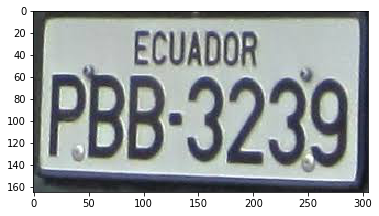

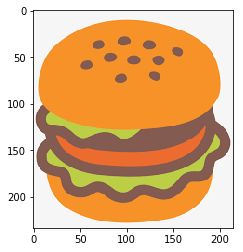

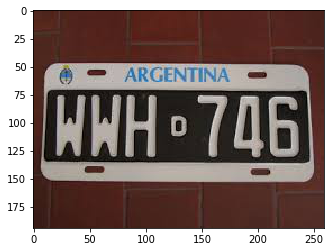

In [0]:
#checking to see that i have the actual images

import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
  img = mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
#declaring image dimensions
nrows = 64
ncolumns = 64
channels = 3 #because they are coloured images


In [0]:
#writing a function to read and process the image to an acceptable format for the model
def read_and_process_images(list_of_images):
  """
  Returns two arrays:
    X is an array of resized images
    Y is an array of labels
  """
  X = [] #initializing empty X list
  Y = [] #initializing empty Y list
  
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation = cv2.INTER_CUBIC)) #Read the image
    #get the labels
    if 'images' in image:
      Y.append(0) #setting 0 for negative images
    else:
      Y.append(1) #setting 1 for plate numbers
  return X,Y

In [0]:
X,Y = read_and_process_images(train_imgs)
# X is now an array of image pixel values while Y is a list of labels

In [0]:
X[0]


array([[[ 62,  68,  58],
        [ 67,  64,  60],
        [ 61,  64,  65],
        ...,
        [ 90,  80,  81],
        [ 86,  73,  73],
        [ 54,  39,  36]],

       [[ 57,  61,  55],
        [ 72,  71,  67],
        [ 44,  50,  49],
        ...,
        [ 73,  68,  69],
        [ 74,  65,  62],
        [ 52,  40,  36]],

       [[ 62,  66,  61],
        [ 66,  63,  63],
        [ 52,  61,  58],
        ...,
        [ 95,  97,  95],
        [ 74,  69,  64],
        [ 68,  58,  51]],

       ...,

       [[ 84,  85,  76],
        [ 77,  78,  69],
        [ 60,  58,  50],
        ...,
        [104,  73,  68],
        [ 56,  35,  33],
        [ 34,  38,  33]],

       [[ 87,  81,  74],
        [ 85,  83,  73],
        [ 84,  85,  73],
        ...,
        [ 53,  46,  45],
        [ 30,  25,  24],
        [ 42,  40,  39]],

       [[ 85,  79,  72],
        [ 78,  76,  66],
        [ 83,  83,  71],
        ...,
        [ 32,  27,  26],
        [ 33,  29,  28],
        [ 60,  58,  57]]

In [0]:
Y[0:5]

[1, 0, 1, 0, 1]

In [0]:
#converting the list objects to array
X = np.array(X)
Y = np.array(Y)


In [0]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", Y.shape)

Shape of train images is: (100, 64, 64, 3)
Shape of labels is: (100,)


In [0]:
classes = {0: 'random image',
          1: 'license plate'}


In [0]:
def show_images(X, y, idx) :
  image = X[idx]

  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx]]))
  plt.show()
  plt.show()

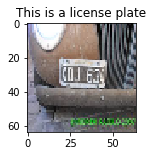

In [0]:
show_images(X, Y, 7)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Shape of train image is:", X_train.shape)
print("Shape of validation image is:", X_val.shape)
print("Shape of labels is:", Y_train.shape)
print("Shape of labels is:", Y_val.shape)

Shape of train image is: (80, 64, 64, 3)
Shape of validation image is: (20, 64, 64, 3)
Shape of labels is: (80,)
Shape of labels is: (20,)


In [0]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [0]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.preprocessing.image import img_to_array, load_img


In [0]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape=(64,64,3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)      

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [0]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 
  
val_datagen = ImageDataGenerator(rescale = 1./255)


In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size)  
validation_generator = val_datagen.flow(X_val, Y_val, batch_size=batch_size)


In [98]:
history = model.fit_generator(train_generator, 
    steps_per_epoch = ntrain // batch_size, 
    epochs = 64,
    validation_data = validation_generator, 
    validation_steps = nval // batch_size) 
  


Epoch 1/64
2/2 [==============================] - 7s 4s/step - loss: 1.6270 - acc: 0.6181 - val_loss: 2.1624 - val_acc: 0.5000
Epoch 2/64
2/2 [==============================] - 0s 51ms/step - loss: 1.1773 - acc: 0.5312 - val_loss: 0.6849 - val_acc: 0.5000
Epoch 3/64
2/2 [==============================] - 0s 38ms/step - loss: 0.6890 - acc: 0.5278 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 4/64
2/2 [==============================] - 0s 73ms/step - loss: 0.6831 - acc: 0.5347 - val_loss: 0.7028 - val_acc: 0.5000
Epoch 5/64
2/2 [==============================] - 0s 72ms/step - loss: 0.6845 - acc: 0.5382 - val_loss: 0.6432 - val_acc: 0.5000
Epoch 6/64
2/2 [==============================] - 0s 59ms/step - loss: 0.7218 - acc: 0.5156 - val_loss: 0.6754 - val_acc: 0.5000
Epoch 7/64
2/2 [==============================] - 0s 69ms/step - loss: 0.6220 - acc: 0.5625 - val_loss: 0.6705 - val_acc: 0.5000
Epoch 8/64
2/2 [==============================] - 0s 61ms/step - loss: 0.7493 - acc: 0.4688 - val_l

In [0]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')